In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from abc import ABC, abstractmethod

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
users = pd.read_csv('./accounts_age_0623.csv',encoding='utf-8')

In [ ]:
sns.distplot(users.g_age)

In [2]:
clicks = pd.read_csv('./clicks_day_time_0623.csv',encoding='utf-8')

In [ ]:
clicks['time'] = clicks['request_date_time'].str.slice(start=11, stop=13)
clicks['day'] = clicks['request_date_time'].str.slice(start=0,stop=11)

In [ ]:
orders = pd.read_csv('./orders_preprocessed_0623.csv',encoding='utf-8')

In [3]:
books = pd.read_csv('./pro_preprocessed_0623.csv',encoding='utf-8')

### 활동시간구분 

In [3]:
clicks = clicks.sort_values(by=['account_id','Unnamed: 0'])

In [4]:
clicks_1 = clicks.iloc[:20088683]
clicks_2 = clicks.iloc[20088683:40177057]
clicks_3 = clicks.iloc[40177057:]

In [5]:
len(clicks) == (len(clicks_1)+len(clicks_2)+len(clicks_3))

True

In [6]:
clicks_1['click_time'] = clicks_1['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')
clicks_2['click_time'] = clicks_2['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')
clicks_3['click_time'] = clicks_3['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [10]:
clicks_1[['day','night']]=pd.get_dummies(clicks_1.click_time)
clicks_2[['day','night']]=pd.get_dummies(clicks_2.click_time)
clicks_3[['day','night']]=pd.get_dummies(clicks_3.click_time)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
grouped_1 = clicks_1.groupby('account_id')
grouped_2 = clicks_2.groupby('account_id')
grouped_3 = clicks_3.groupby('account_id')

In [12]:
acc_times_1 = grouped_1.sum().iloc[:,[4,5]]
acc_times_2 = grouped_2.sum().iloc[:,[4,5]]
acc_times_3 = grouped_3.sum().iloc[:,[4,5]]

In [32]:
acc_times = pd.concat([acc_times_1,acc_times_2,acc_times_3])

In [19]:
acc_times.to_csv('./only_activity_times_0623.csv')

In [33]:
acc_times.reset_index(inplace=True)

In [36]:
new_users = users.merge(acc_times,how='left')

In [42]:
new_users.to_csv('./accounts_age_times_0623.csv')

### 활동 요일 구분

In [2]:
users = pd.read_csv('./accounts_age_times_0623.csv',encoding='utf-8')

In [3]:
clicks = pd.read_csv('./clicks_day_time_0623.csv',encoding='utf-8')

In [4]:
clicks = clicks.sort_values(by=['account_id','Unnamed: 0'])

In [5]:
clicks['date_time'] = pd.to_datetime(clicks.day)

In [6]:
clicks['week_day'] = clicks['date_time'].dt.weekday_name

In [7]:
clicks.to_csv('./clicks_day_time_weekday_0624.csv')

In [2]:
users = pd.read_csv('./accounts_age_times_0623.csv',encoding='utf-8')

In [3]:
clicks = pd.read_csv('./clicks_day_time_weekday_0624.csv',encoding='utf-8')

In [4]:
clicks_a = clicks.iloc[:20088683]
clicks_b = clicks.iloc[20088683:40177057]
clicks_c = clicks.iloc[40177057:]

In [5]:
clicks_a['weekend'] = clicks_a['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)
clicks_b['weekend'] = clicks_b['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)
clicks_c['weekend'] = clicks_c['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [6]:
clicks_a['weekday'] = clicks_a['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)
clicks_b['weekday'] = clicks_b['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)
clicks_c['weekday'] = clicks_c['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [7]:
grouped_a = clicks_a.groupby('account_id')
grouped_b = clicks_b.groupby('account_id')
grouped_c = clicks_c.groupby('account_id')

In [8]:
grouped_a.sum()

,Unnamed: 0,Unnamed: 0.1,product_id,before_product_id,time,weekend,weekday
account_id,,,,,,,
100001,20020170048,20020170048,29193294670,3060650628,4875,146,238
100004,1605029050,1605029050,2985000262,1048317448,787,11,30
100014,265177530,265177530,615505327,82321556,256,0,20
100018,343434186,343434186,802858164,383848406,146,5,7
100020,1149121164,1149121164,1549331201,341294227,306,8,16
...,...,...,...,...,...,...,...
3310558,90140679,90140679,554759213,111630549,199,5,4
3310563,313500159,313500159,464855993,262650676,216,8,6
3310564,23598264,23598264,89243886,0,17,0,1


In [16]:
acc_weekend_a = grouped_a.sum().iloc[:,[5,6]]
acc_weekend_b = grouped_b.sum().iloc[:,[5,6]]
acc_weekend_c = grouped_c.sum().iloc[:,[5,6]]

In [17]:
acc_weekend_a

,weekend,weekday
account_id,,
100001,146,238
100004,11,30
100014,0,20
100018,5,7
100020,8,16
...,...,...
3310558,5,4
3310563,8,6
3310564,0,1


In [18]:
acc_weekends = pd.concat([acc_weekend_a,acc_weekend_b,acc_weekend_c])

In [19]:
acc_weekends.to_csv('./only_activity_weekends_0624.csv')

In [20]:
acc_weekends.reset_index(inplace=True)

In [21]:
acc_weekends

,account_id,weekend,weekday
0,100001,146,238
1,100004,11,30
2,100014,0,20
3,100018,5,7
4,100020,8,16
...,...,...,...
1594107,16960408,1,0
1594108,16960413,2,0
1594109,16960422,1,0
1594110,16960424,1,0


In [22]:
new_users = users.merge(acc_weekends,how='left')

In [23]:
new_users

,Unnamed: 0,Unnamed: 0.1,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday
0,0,0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0
1,1,1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0
2,2,2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0
3,3,3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0
4,4,4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,1670270,1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN
1670271,1670271,1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN
1670272,1670272,1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN
1670273,1670273,1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN


In [24]:
new_users.to_csv('./accounts_age_times_weekdays_0624.csv')

### 비율구하기

In [36]:
new_users = pd.read_csv('./accounts_age_times_weekdays_0624.csv',encoding='utf-8')

In [38]:
new_users['tmp'] = new_users['day'] + new_users['night']

In [40]:
new_users['day_ratio'] = new_users['day']/new_users['tmp']

In [42]:
new_users['night_ratio'] = 1 - new_users['day_ratio']

In [44]:
new_users['total'] = new_users['weekend'] + new_users['weekday']

In [46]:
new_users.drop('tmp',axis=1,inplace=True)

In [48]:
new_users['weekend_ratio'] = new_users['weekend']/new_users['total']

In [50]:
new_users['weekday_ratio'] = 1 - new_users['weekend_ratio']

In [52]:
new_users.isnull().sum()

Unnamed: 0            0
account_id            0
gender                0
age                   0
g_age                 0
address               0
address_is            0
last_login            0
day              138731
night            138731
weekend          138731
weekday          138731
day_ratio        138731
night_ratio      138731
total            138731
weekend_ratio    138731
weekday_ratio    138731
dtype: int64

In [53]:
new_users.to_csv('./accounts_semi_final_0624.csv')

### 관여도 구하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv('./accounts_semi_final_0624.csv',encoding='utf-8')

In [3]:
clicks = pd.read_csv('./clicks_day_time_weekday_0624.csv',encoding='utf-8')

In [4]:
orders = pd.read_csv('./orders_preprocessed_0623.csv',encoding='utf-8')

In [6]:
clicks_1 = clicks.iloc[:20088683]
clicks_2 = clicks.iloc[20088683:40177057]
clicks_3 = clicks.iloc[40177057:]

In [7]:
clicks_1

,Unnamed: 0,Unnamed: 0.1,request_date_time,account_id,device_type,product_id,before_product_id,time,day,date_time,week_day
0,52135668,52135668,2020-01-19 03:37:30,100001,M,84434768,0,3,2020-01-19,2020-01-19,Sunday
1,52135669,52135669,2020-02-09 11:41:58,100001,M,85928045,0,11,2020-02-09,2020-02-09,Sunday
2,52135670,52135670,2019-12-20 00:28:08,100001,M,84677812,0,0,2019-12-20,2019-12-20,Friday
3,52135671,52135671,2020-01-14 19:59:58,100001,M,42748412,0,19,2020-01-14,2020-01-14,Tuesday
4,52135672,52135672,2020-02-15 19:18:40,100001,M,84678067,0,19,2020-02-15,2020-02-15,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
20088678,54314051,54314051,2020-05-13 23:14:12,3310570,M,77986035,0,23,2020-05-13,2020-05-13,Wednesday
20088679,54314052,54314052,2020-05-02 00:38:29,3310570,M,50085393,0,0,2020-05-02,2020-05-02,Saturday
20088680,54314053,54314053,2019-12-28 21:09:22,3310570,M,81517493,0,21,2019-12-28,2019-12-28,Saturday
20088681,54314054,54314054,2020-05-02 00:30:40,3310570,M,57430650,0,0,2020-05-02,2020-05-02,Saturday


In [10]:
grouped_1 = clicks_1.groupby('account_id')
grouped_2 = clicks_2.groupby('account_id')
grouped_3 = clicks_3.groupby('account_id')

In [16]:
acc_clicks_1 = grouped_1.count().iloc[:,1]
acc_clicks_2 = grouped_2.count().iloc[:,1]
acc_clicks_3 = grouped_3.count().iloc[:,1]

In [15]:
acc_clicks_1

account_id
100001     384
100004      41
100014      20
100018      12
100020      24
          ... 
3310558      9
3310563     14
3310564      1
3310569     41
3310570    513
Name: Unnamed: 0.1, Length: 368432, dtype: int64

In [17]:
acc_clicks = pd.concat([acc_clicks_1,acc_clicks_2,acc_clicks_3])

In [21]:
acc_clicks=pd.DataFrame(acc_clicks)

In [22]:
acc_clicks

,Unnamed: 0.1
account_id,
100001,384
100004,41
100014,20
100018,12
100020,24
...,...
16960408,1
16960413,2
16960422,1


In [23]:
acc_clicks.to_csv('./only_clicks_0624.csv')

In [24]:
acc_clicks.reset_index(inplace=True)

In [28]:
acc_clicks.columns = ['account_id','click_counts']

In [29]:
acc_clicks

,account_id,click_counts
0,100001,384
1,100004,41
2,100014,20
3,100018,12
4,100020,24
...,...,...
1594107,16960408,1
1594108,16960413,2
1594109,16960422,1
1594110,16960424,1


In [48]:
new_users = users.merge(acc_clicks,how='left')

In [50]:
new_users.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
new_users.drop('Unnamed: 0.1',axis=1,inplace=True)

In [52]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
new_users.to_csv('./accounts_click_counts_0624.csv')

In [54]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
orders

,Unnamed: 0,order_id,account_id,product_id,price,created_at
0,0,222100083,101307,164108,9000.0,2020-05-14 11:40:16.380
1,1,217486577,101307,5193211,12600.0,2020-03-16 13:22:19.646
2,2,219762355,101307,89846594,11610.0,2020-04-11 22:51:05.034
3,3,222711844,101307,5822521,8820.0,2020-05-23 14:05:09.360
4,4,222564324,101307,90247432,13500.0,2020-05-21 00:10:50.980
...,...,...,...,...,...,...
8382509,8382509,223890751,16990255,89317795,19800.0,2020-06-09 19:15:15.294
8382510,8382510,223890751,16990255,58081328,12350.0,2020-06-09 19:15:15.294
8382511,8382511,223900776,16990928,61779464,12420.0,2020-06-09 22:23:28.474
8382512,8382512,223900776,16990928,90266627,13500.0,2020-06-09 22:23:28.474


In [39]:
grouped_o = orders.groupby('account_id')

In [41]:
acc_orders = grouped_o.count().iloc[:,1]

In [42]:
acc_orders = pd.DataFrame(acc_orders)

In [43]:
acc_orders

,order_id
account_id,
100001,45
100004,11
100014,1
100018,2
100020,4
...,...
16991192,2
16991193,1
16991195,1


In [44]:
acc_orders.reset_index(inplace=True)

In [45]:
acc_orders.columns = ['account_id','order_counts']

In [55]:
acc_orders

,account_id,order_counts
0,100001,45
1,100004,11
2,100014,1
3,100018,2
4,100020,4
...,...,...
1741573,16991192,2
1741574,16991193,1
1741575,16991195,1
1741576,16991207,1


In [ ]:
users = pd.read_csv('./accounts_click_counts_0624.csv',encoding='utf-8')

In [56]:
new_new_users = new_users.merge(acc_orders,how='left')

In [57]:
new_new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [58]:
new_new_users.to_csv('./accounts_click_order_counts_0624.csv')

In [59]:
new_new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [60]:
new_new_users['involvement'] = new_new_users['click_counts'] / new_new_users['order_counts']

In [63]:
new_new_users.isnull().sum()

account_id            0
gender                0
age                   0
g_age                 0
address               0
address_is            0
last_login            0
day              138731
night            138731
weekend          138731
weekday          138731
day_ratio        138731
night_ratio      138731
total            138731
weekend_ratio    138731
weekday_ratio    138731
click_counts     138731
order_counts          0
involvement      138731
dtype: int64

In [66]:
new_new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN


In [25]:
from sklearn.preprocessing import MaxAbsScaler

In [26]:
scaler = MaxAbsScaler()

In [27]:
temp = users[['account_id','involvement']].copy()

In [28]:
temp

,account_id,involvement
0,102600,3.40
1,103417,10.00
2,105247,32.00
3,109061,11.00
4,109217,2.25
...,...,...
1670270,16983289,NaN
1670271,16983447,NaN
1670272,16983639,NaN
1670273,16983644,NaN


In [29]:
temp[:] = scaler.fit_transform(temp[:])

In [30]:
temp.columns = ['xx','involement_normalized']

In [31]:
temp

,xx,involement_normalized
0,0.006038,0.000457
1,0.006086,0.001345
2,0.006194,0.004305
3,0.006419,0.001480
4,0.006428,0.000303
...,...,...
1670270,0.999533,NaN
1670271,0.999543,NaN
1670272,0.999554,NaN
1670273,0.999554,NaN


In [87]:
new_new_users['normalized_involvement'] = temp.involement_normalized

In [88]:
new_new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40,0.000455
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00,0.001343
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00,0.004302
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00,0.001478
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [89]:
new_new_users.to_csv('./accounts_context_0624.csv')

In [91]:
aa = pd.read_csv('./accounts_context_0624.csv',encoding='utf-8')

In [92]:
aa.isnull().sum()

Unnamed: 0                     0
account_id                     0
gender                         0
age                            0
g_age                          0
address                        0
address_is                     0
last_login                     0
day                       138731
night                     138731
weekend                   138731
weekday                   138731
day_ratio                 138731
night_ratio               138731
total                     138731
weekend_ratio             138731
weekday_ratio             138731
click_counts              138731
order_counts                   0
involvement               138731
normalized_involvement    138731
dtype: int64

### 활동시간 더미

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
users = pd.read_csv('./accounts_context_0624.csv',encoding='utf-8')

In [5]:
users.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
new_users = users.dropna()

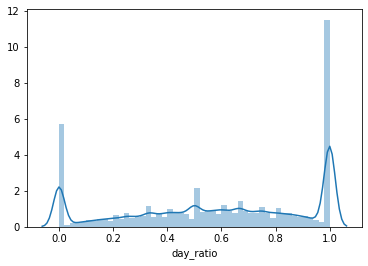

In [13]:
sns.distplot(new_users.day_ratio)

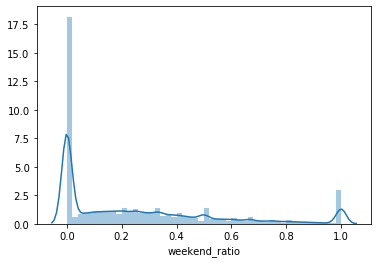

In [14]:
sns.distplot(new_users.weekend_ratio)

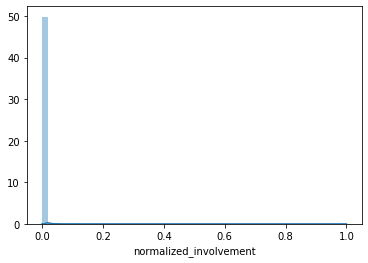

In [16]:
sns.distplot(new_users.normalized_involvement)

In [32]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40,0.000455
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00,0.001343
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00,0.004302
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00,0.001478
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670224,16955274,0.0,28.0,2.0,서울특별시 서초구 서초동 1364-21,1,2020-05-30 06:37:44,2.0,0.0,2.0,0.0,1.000000,0.000000,2.0,1.000000,0.000000,2.0,2,1.00,0.000132
1670225,16957084,1.0,31.0,3.0,서울특별시 광진구 광장동 554-7 광장현대아파트,1,2020-05-30 16:26:39,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267
1670226,16957506,0.0,51.0,5.0,경상북도 경산시 계양동 74-1 남부자동차학원,1,2020-05-31 00:21:15,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1,1.00,0.000132
1670227,16959433,1.0,42.0,3.0,부산광역시 사상구 학장동 167-3 학장대림아파트,1,2020-05-31 11:02:01,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267


In [33]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40,0.000455
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00,0.001343
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00,0.004302
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00,0.001478
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670224,16955274,0.0,28.0,2.0,서울특별시 서초구 서초동 1364-21,1,2020-05-30 06:37:44,2.0,0.0,2.0,0.0,1.000000,0.000000,2.0,1.000000,0.000000,2.0,2,1.00,0.000132
1670225,16957084,1.0,31.0,3.0,서울특별시 광진구 광장동 554-7 광장현대아파트,1,2020-05-30 16:26:39,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267
1670226,16957506,0.0,51.0,5.0,경상북도 경산시 계양동 74-1 남부자동차학원,1,2020-05-31 00:21:15,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1,1.00,0.000132
1670227,16959433,1.0,42.0,3.0,부산광역시 사상구 학장동 167-3 학장대림아파트,1,2020-05-31 11:02:01,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267


In [40]:
users['dayday'] = users['day_ratio'].apply(lambda x:1 if x >0.6 else 0)

In [41]:
users['nightnight'] = users['day_ratio'].apply(lambda x:1 if x<0.4 else 0)

In [42]:
users['balance'] = users['dayday'] + users['nightnight']

In [44]:
users['balance'] = users['balance'].apply(lambda x:0 if x == 1 else 1)

In [46]:
users['weekdayday'] = users['weekend_ratio'].apply(lambda x:1 if x<0.5 else 0)

In [50]:
users['weekendend'] = users['weekend_ratio'].apply(lambda x:1 if x > 0.5 else 0)

In [54]:
users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,...,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement,dayday,nightnight,balance,weekdayday,weekendend
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,...,0.882353,17.0,5,3.40,0.000455,1,0,0,1,0
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,...,1.000000,20.0,2,10.00,0.001343,1,0,0,1,0
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,...,0.796875,64.0,2,32.00,0.004302,1,0,0,1,0
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,...,1.000000,11.0,1,11.00,0.001478,0,1,0,1,0
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,...,0.555556,9.0,4,2.25,0.000301,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,0,0,1,0,0
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,0,0,1,0,0


In [55]:
users.to_csv('./accounts_context_0624.csv')

In [58]:
users.nightnight.value_counts()

0    1217760
1     452515
Name: nightnight, dtype: int64

In [56]:
pd.read_csv('./accounts_context_0624.csv')

,Unnamed: 0,account_id,gender,age,g_age,address,address_is,last_login,day,night,...,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement,dayday,nightnight,balance,weekdayday,weekendend
0,0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,...,0.882353,17.0,5,3.40,0.000455,1,0,0,1,0
1,1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,...,1.000000,20.0,2,10.00,0.001343,1,0,0,1,0
2,2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,...,0.796875,64.0,2,32.00,0.004302,1,0,0,1,0
3,3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,...,1.000000,11.0,1,11.00,0.001478,0,1,0,1,0
4,4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,...,0.555556,9.0,4,2.25,0.000301,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670271,1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,...,NaN,NaN,5,NaN,NaN,0,0,1,0,0
1670272,1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670273,1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,...,NaN,NaN,2,NaN,NaN,0,0,1,0,0


click_books = clicks.merge(books,how='inner')
click_users = clicks.merge(users,how='inner')
order_books = orders[['order_id','account_id','product_id','created_at']].merge(books,how='inner')
order_users = orders[['order_id','account_id','product_id','created_at']].merge(users,how='inner')

click_books.to_csv('./click_books.csv')
click_users.to_csv('./click_users.csv')
order_books.to_csv('./order_books.csv')
order_users.to_csv('./order_users.csv')